In [ ]:
#方便复制用的
2023-wimbledon-man-double    2023-wimbledon-3601
2023-wimbledon-mixed         2023-wimbledon-5501
2023-wimbledon-woman         2023-wimbledon-2701
2023-wimbledon-woman-double  2023-wimbledon-4601
2017-frenchopen-man          2017-frenchopen-1701
2023-usopen-man              2023-usopen-1701

211
211
211
211
Accuracy: 0.5308056872037915
              precision    recall  f1-score   support

           0       0.61      0.41      0.49       116
           1       0.48      0.67      0.56        95

    accuracy                           0.53       211
   macro avg       0.55      0.54      0.53       211
weighted avg       0.55      0.53      0.52       211

MSE: 0.2656365803665467
RMSE: 0.5153994376855165
MAE: 0.4951281016521118


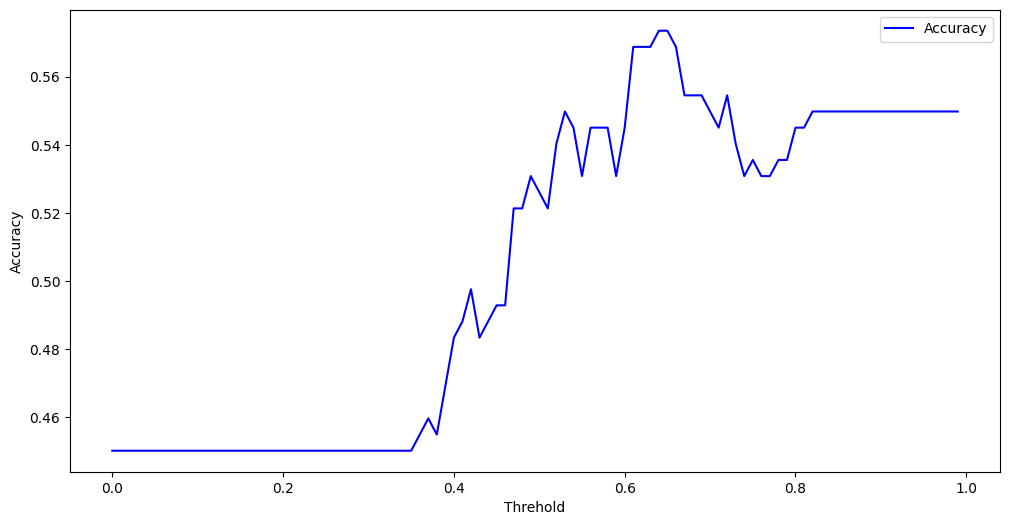

In [90]:
import csv
import joblib
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import math

model = joblib.load('logistic_regression_model.joblib')

#指定比赛场次
Match_id = "2023-usopen-1701"
#指定窗口大小
window_size = 5
#指定比赛类型
Match_type = "2023-usopen-man"
csv_path = Match_type + '.csv'


match = 1
point_no = 7
p1_sets = 8
p2_sets = 9
p1_games = 10
p2_games = 11
server = 14
server_no = 15
point_victor = 16
p1_ace = 21
p2_ace = 22
p1_winner = 23
p2_winner = 24
winner_shot_type =25
p1_double_fault = 26
p2_double_fault = 27
p1_unf_err = 28
p2_unf_err = 29
p1_net_pt = 30
p2_net_pt = 31
p1_net_pt_won = 32
p2_net_pt_won = 33
p1_break_pt = 34
p2_break_pt = 35
p1_break_pt_won = 36
p2_break_pt_won = 37
p1_distance_run = 40
p2_distance_run = 41
rally_count = 42
speed_mph = 43
serve_width = 44
serve_depth = 45
return_depth =46

match_data_list = []

with open(csv_path, 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader, None)
    
    for row in csv_reader:
        if row[match] == Match_id:
            match_data_list.append(row)

for row in match_data_list:
    for i in range(4, 12):  # 第4-11列
        row[i] = float(row[i]) 
    for i in range(14, len(row)):  # 第16-最后一列
        if row[i] == '-1' or row[i] == '':
            row[i] = 0
        row[i] = float(row[i])
        
        
point_number = 0
serve_width_avg = 1
point_victor_rate = 2
p1_break_pt_won_rate = 3

def calculate_p1(current_point_number):
    p1_data_given_time = [None] * 4
    
    player_no = 1
    pn =  int(current_point_number)-1
    first_serve_success = 0
    serve_number = 0
    victor_number = 0
    break_pt_number = 0
    break_pt_won_number = 0
    serve_width_number = 0
    
    p1_data_given_time[point_number] = current_point_number
    for i in range(window_size):
        if match_data_list[pn-i][server] == player_no:
            serve_number += 1
            serve_width_number += match_data_list[pn-i][serve_width]
        
        if match_data_list[pn-i][point_victor] == player_no:
            victor_number += 1
            
        if match_data_list[pn-i][p1_break_pt] == 1:
            break_pt_number += 1
        
        if match_data_list[pn-i][p1_break_pt_won] == 1:
            break_pt_won_number += 1

        
    if serve_number == 0:
        p1_data_given_time[serve_width_avg] = 0
    else:
        p1_data_given_time[serve_width_avg] = serve_width_number / serve_number
        
    p1_data_given_time[point_victor_rate] = victor_number / window_size
    
    if break_pt_number == 0:
        p1_data_given_time[p1_break_pt_won_rate] = 0
    else:
        p1_data_given_time[p1_break_pt_won_rate] = break_pt_won_number / break_pt_number 
    
    #print(p1_data_given_time)
    return p1_data_given_time

def calculate_p2(current_point_number):
    p2_data_given_time = [None] * 4
    
    player_no = 2
    pn =  int(current_point_number)-1
    first_serve_success = 0
    serve_number = 0
    victor_number = 0
    break_pt_number = 0
    break_pt_won_number = 0
    serve_width_number = 0
    
    p2_data_given_time[point_number] = current_point_number
    for i in range(window_size):
        if match_data_list[pn-i][server] == player_no:
            serve_number += 1
            serve_width_number += match_data_list[pn-i][serve_width]
        
        if match_data_list[pn-i][point_victor] == player_no:
            victor_number += 1
            
        if match_data_list[pn-i][p1_break_pt] == 1:
            break_pt_number += 1
        
        if match_data_list[pn-i][p1_break_pt_won] == 1:
            break_pt_won_number += 1

        
    if serve_number == 0:
        p2_data_given_time[serve_width_avg] = 0
    else:
        p2_data_given_time[serve_width_avg] = serve_width_number / serve_number
        
    p2_data_given_time[point_victor_rate] = victor_number / window_size
    
    if break_pt_number == 0:
        p2_data_given_time[p1_break_pt_won_rate] = 0
    else:
        p2_data_given_time[p1_break_pt_won_rate] = break_pt_won_number / break_pt_number 
    
    #print(p2_data_given_time)
    return p2_data_given_time

p1_data = []
p2_data = []
p1_sample = []
p2_sample = []

for row in match_data_list:
    if row[point_no] < window_size:
        continue
    p1_data.append(list(calculate_p1(row[point_no])))
    p2_data.append(list(calculate_p2(row[point_no])))
    if row[point_no] == match_data_list[-1][point_no]:
        if row[point_victor] == 1:
            p1_sample.append(1)
            p2_sample.append(0)
        else:
            p1_sample.append(0)
            p2_sample.append(1)
    else:
        predict_point = int(row[point_no])
        if match_data_list[predict_point][point_victor] == 1:
            p1_sample.append(1)
            p2_sample.append(0)
        else:
            p1_sample.append(0)
            p2_sample.append(1)


            
def convert_to_float(nested_list):
    return [[float(element) for element in row] for row in nested_list]

data1 = convert_to_float(p1_data)
data2 = convert_to_float(p2_data)
data = []

for i in range(len(data1)):
    k = [None] * 4
    k[0] = data1[i][0]
    k[1] = data1[i][1] - data2[i][1]
    k[2] = data1[i][2] - data2[i][2]
    k[3] = data1[i][3] - data2[i][3]
    data.append(list(k))


print(len(data))
print(len(data1))
print(len(data2))
print(len(p1_sample))
    
X_test = np.array(data)[:, 1:]
y_test = np.array(p1_sample).astype(int)
X_train = np.load('X_train.npy')

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_prob = model.predict_proba(X_test_scaled)[:, 1]


threshold = 0.55

y_pred = (y_prob >= threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

mse = mean_squared_error(y_test,y_prob)
mae = mean_absolute_error(y_test,y_prob)
# 打印结果
print("MSE:", mse)
print("RMSE:", math.sqrt(mse))
print("MAE:", mae)

threshold = 0
thre = []
accu = []

for i in range(100):
    t = threshold + float(i / 100)
    y_pred = (y_prob >= t).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    thre.append(t)
    accu.append(accuracy)

plt.figure(figsize=(12, 6))

# 绘制图表
plt.plot(thre, accu, linestyle='-', color='b', label='Accuracy')

# 添加标签和标题
plt.xlabel('Threhold')
plt.ylabel('Accuracy')

# 显示图例
plt.legend()

png_path = Match_type + '.png'
plt.savefig(png_path,dpi=600)

# 显示图表
plt.show()

In [91]:
def find_closest_to_50(lst):
    max_value = max(lst)
    max_indices = [index for index, value in enumerate(lst) if value == max_value]
    closest_number = min(max_indices, key=lambda x: abs(x - 50))
    return closest_number

max_threhold = thre[find_closest_to_50(accu)]
y_pred = (y_prob >= max_threhold).astype(int)
max_accuracy = accuracy_score(y_test, y_pred)

selected_threhold = 0.55
y_pred = (y_prob >= selected_threhold).astype(int)
selected_accuracy = accuracy_score(y_test, y_pred)

txt_path = Match_type + '.txt'
with open(txt_path, 'w') as file:
    file.write(f"选取比赛:{Match_id}\n")
    file.write(f"当前阈值:{max_threhold}\n")
    file.write(f"当前准确度:{max_accuracy}\n")
    file.write(f"0.55阈值下准确度:{selected_accuracy}\n")
    file.write(f"MSE:{mse}\n")
    file.write(f"RMSE:{math.sqrt(mse)}\n")
    file.write(f"MAE:{mae}\n")
    